In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# Esercizio 12.1

In questa esercitazione vogliamo eseguire un problema di classificazione,ovvero riconoscere la scrittura a mano nel caso delle dieci cifre, con un metodo di Machine Learning, in particolare una deep neural net (DNN). I dati per allenare la rete neurale ci sono forniti da MNIST, nella forma di  $N=70000$ immagini dalle dimensioni di $28 \times 28$ pixel.

Nle primo esercizio vogliamo, come fatto anche nell'esercitazione precedente, provare la rete neurale con diversi optimizer e vedere con quale di essi si ottengono i migliori risultati.

Carichiamo i dati e creiamo un modello con SGD come optimizer, dopo eseguiamo la stessa operazione con altri tre diversi optimizer.

In [2]:
img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits ---> è il numero di classi della classificazione, da usare con softmax
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


Creiamo la Deep Neural net. L'ultimo layers utilizza la funzione di attivazione "softmax" che permette di effettuare la classifazione in un numero di classi "num_classes" tramite una distribuzione di probabilità. 

In [4]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

Alleniamo quindi la DNN.

In [5]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model(SGD())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=5,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


E infine valutiamone la loss e l'accuracy, graficandone anche l'andamento in funzione del numero di epoche


Test loss: 0.15558648517280818
Test accuracy: 0.9513


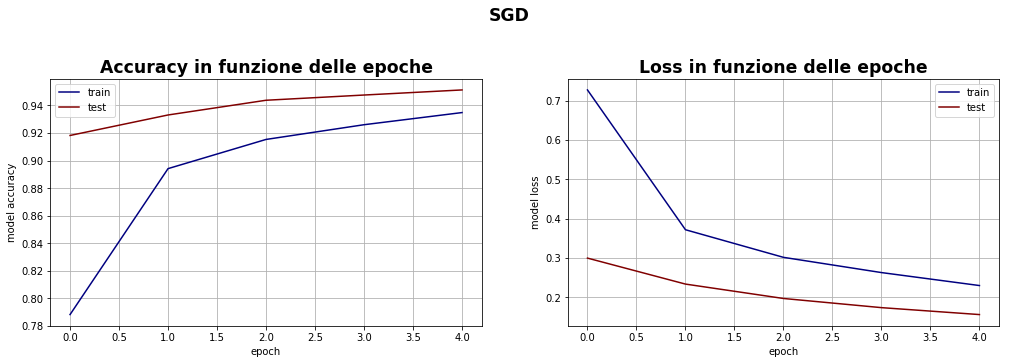

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.figure(figsize=(17,10))
plt.suptitle("SGD", weight="bold",size="xx-large")
plt.subplot(221)
plt.title("Accuracy in funzione delle epoche", weight="bold",size="xx-large")
plt.plot(history.history['accuracy'],color="navy",label="train")
plt.plot(history.history['val_accuracy'],color="maroon",label="test")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(loc='best')

# summarize history for loss
plt.subplot(222)
plt.title("Loss in funzione delle epoche", weight="bold",size="xx-large")
plt.plot(history.history['loss'],color="navy",label="train")
plt.plot(history.history['val_loss'],color="maroon",label="test")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(loc='best')
plt.show()

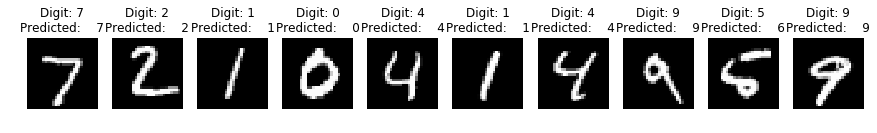

In [7]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)
X_2test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_2test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Eseguiamo ora la stessa operazione con Adagrad, Adadelta e Adam.

In [8]:
optimizers=[Adagrad(),Adadelta(),Adam()]
Label=["Adagrad","Adadelta","Adam"]

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 1.3463 - accuracy: 0.5981 - val_loss: 0.6780 - val_accuracy: 0.8600
Epoch 2/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.7482 - accuracy: 0.7828 - val_loss: 0.4696 - val_accuracy: 0.8927
Epoch 3/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.6047 - accuracy: 0.8246 - val_loss: 0.3943 - val_accuracy: 0.9039
Epoch 4/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.5362 - accuracy: 0.8468 - val_loss: 0.3543 - val_accuracy: 0.9099
Epoch 5/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.4869 - accuracy: 0.8616 - val_loss: 0.3272 - val_accuracy: 0.9134
Adagrad
Test loss: 0.32722518909573556
Test accuracy: 0.9134


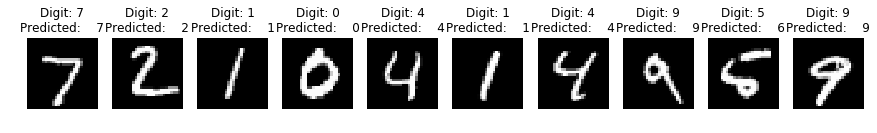

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 195us/sample - loss: 2.2258 - accuracy: 0.1836 - val_loss: 2.0952 - val_accuracy: 0.3996
Epoch 2/5
60000/60000 [==============================] - 11s 179us/sample - loss: 2.0604 - accuracy: 0.3101 - val_loss: 1.9316 - val_accuracy: 0.5893
Epoch 3/5
60000/60000 [==============================] - 11s 182us/sample - loss: 1.9091 - accuracy: 0.4239 - val_loss: 1.7675 - val_accuracy: 0.6839
Epoch 4/5
60000/60000 [==============================] - 11s 180us/sample - loss: 1.7623 - accuracy: 0.5052 - val_loss: 1.6061 - val_accuracy: 0.7389
Epoch 5/5
60000/60000 [==============================] - 12s 196us/sample - loss: 1.6221 - accuracy: 0.5630 - val_loss: 1.4527 - val_accuracy: 0.7728
Adadelta
Test loss: 1.4526510688781737
Test accuracy: 0.7728


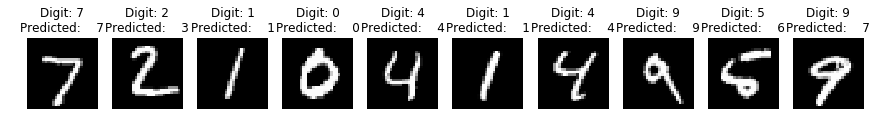

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2831 - accuracy: 0.9162 - val_loss: 0.1134 - val_accuracy: 0.9653
Epoch 2/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1220 - accuracy: 0.9661 - val_loss: 0.0858 - val_accuracy: 0.9742
Epoch 3/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0880 - accuracy: 0.9746 - val_loss: 0.0759 - val_accuracy: 0.9779
Epoch 4/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0745 - val_accuracy: 0.9783
Epoch 5/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0745 - val_accuracy: 0.9796
Adam
Test loss: 0.07448937715137799
Test accuracy: 0.9796


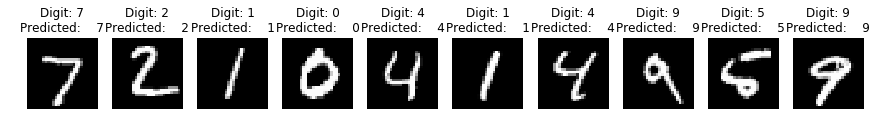

In [9]:
for i in range(3):
    batch_size = 32
    epochs = 5

    # create the deep neural net
    model_DNN = compile_model(optimizers[i])

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)

    print(Label[i])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    predictions = model_DNN.predict(X_test)
    X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test2[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()

Adam sembra essere il più funzionale per questo tipo di problema, con un'accuracy che sfiora il 98%.

### Exercise 12.2

In questo esercizio vogliamo usare una convolutional neural net (CNN) per il medesimo problema di classificazione dell'esercizio precedente. Questa è un particolare tipo di DNN che ci permetterà di ottenere migliori risultati nella classificazione di immagini, nello specifico il nostro scopo è che la rete neurale riesca ad individuare la giusta cifra indipendentemente da traslazioni nella griglia di pixel dell'immagine.

Per ottenre una CNN dobbiamo utilizzare altri layer, oltre a quello Dense che abbiamo già utilizzato, in particolare:
- Conv2D: Effettua una convoluzione spaziale dell'input tramite un certo numero di filtri
- MaxPooling: raggruppa le dimensioni spaziali in grani di una certa grandezza, prendendo il massimo valore tra gli input appartenenti al grano
- Flatten: "srotola" l'immagine 2D in un vettore 1D
- Dropout: questo layer aiuta ad evitare l'overfitting

In [10]:
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
def create_CNN():
    model = Sequential()
    # layer spiegati su
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(18, kernel_size=(5,5)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(288, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
    return model

Procediamo quindi, dopo aver costruito la CNN, a valutarne le performance. 

In [15]:
model_CNN=create_CNN() #uso la funzione su
# CNN: training
model_CNN.fit(X_train, Y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# accuracy
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 498us/sample - loss: 0.1904 - accuracy: 0.9426 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 2/10
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0702 - accuracy: 0.9789 - val_loss: 0.0319 - val_accuracy: 0.9885
Epoch 3/10
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.0350 - val_accuracy: 0.9871
Epoch 4/10
60000/60000 [==============================] - 30s 499us/sample - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 5/10
60000/60000 [==============================] - 32s 532us/sample - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0348 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 31s 510us/sample - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0291 - val_accuracy: 0.9910
Epoch 7/10
60000/60000 [====================

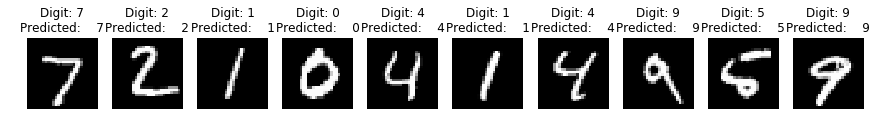

In [16]:
predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.3

Lo scopo di questo esercizio è applicare la CNN precedente alla mia scrittura, nello specifico si sono preparate 10 immagini con gimp. Carichiamo queste immagini e controlliamo se la rete neurale riesce effettivamente a riconoscere le cifre in maniera adeguata.

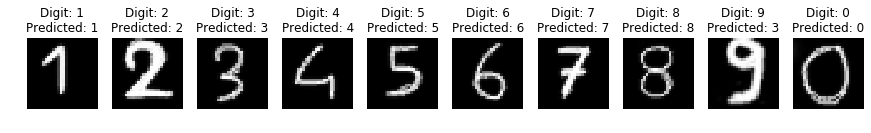

In [17]:
from PIL import Image
plt.figure(figsize=(15,5))
n=["1","2","3","4","5","6","7","8","9","0"]
d=0
for i in range(10):
    digit_filename = n[i]+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]

    data /= 255

    ax =  plt.subplot(2, 10, i + 1)  
    plt.imshow(data, cmap='gray')
    data = data.reshape(1, img_rows, img_cols, 1)
    prediction=model_CNN.predict(data)
    plt.title("Digit: "+n[i]+"\nPredicted: "+str(np.argmax(prediction)))   
    plt.axis('off') 
plt.show()

La rete neurale sbaglia una delle 10 cifre, pertanto ottiene un risultato accettabile.